# CREATING A NN FROM SCRATCH: BY THABO PILUSA

Dataset Preview:
          X1         X2        X3         X4          y
0  3.745401   0.628584  3.210158   0.775226  12.281783
1  9.507143  12.728208  0.420700   7.970319  57.584313
2  7.319939   6.287120  0.808144   8.109527  39.144583
3  5.986585  10.171414  4.492771   9.561449  37.970002
4  1.560186  18.151329  3.032145  10.891370  44.045091
Epoch 10, Loss: 1433.8235
Epoch 20, Loss: 1365.7361
Epoch 30, Loss: 1224.8033
Epoch 40, Loss: 969.3295
Epoch 50, Loss: 602.5741
Epoch 60, Loss: 250.2866
Epoch 70, Loss: 97.3178
Epoch 80, Loss: 54.6664
Epoch 90, Loss: 29.7271
Epoch 100, Loss: 26.5127

Model Performance: MSE = 12.1460
RMSE = 3.4851


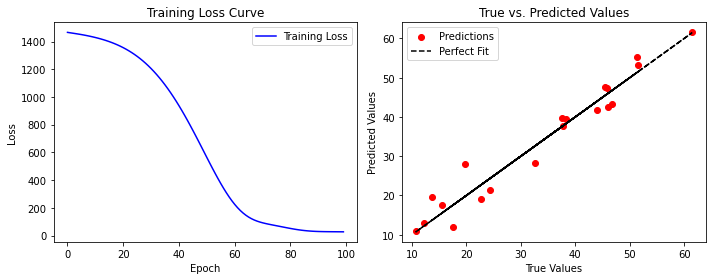

In [1]:
import pandas as pd
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#Loading the dataset, pretty easy stuff ^^
file_path = 'my_data.csv'
df = pd.read_csv(file_path)

#Just to have a peak at the dataset structure
print("Dataset Preview:\n", df.head())

#pick the features (X) and the target (y)
X = df[['X1', 'X2', 'X3', 'X4']].values  # Features
y = df['y'].values.reshape(-1, 1)  # Target (reshaped to column)

#print("Features (X):\n", X)
#print("Target (y):\n", y)


# Normalize the X features
scaler = StandardScaler() # normalise the features in X to be of the same size, z = (x - u) / s, where u is the mean, and s is the standard deviation
X = scaler.fit_transform(X)

# Now 20% testing nd 80% training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state=0.42 ensures the
# go from float to tesor
X_train, X_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(X_test, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

#Define ze Neural Network
class NeuralNet(nn.Module):
    def __init__(self, input_dim):   #input dim is the input number of features, in this instace 4 features
        super(NeuralNet, self).__init__() # this ensures that the  neural network works before we can add our own stuff
        self.fc1 = nn.Linear(input_dim, 16)  # First "hidden" layer (16 neurons), fc1 means fully connected 1, meaning every input is connected to every neuron
        self.fc2 = nn.Linear(16, 8)  #  Second "hidden" layer, 16 inputs, (8 neurons)
        self.fc3 = nn.Linear(8, 1)  # Output layer,  8 inputs, (1 neuron)

    def forward(self, x):  #It explains the forward way of how data flows through the network to produce an output, x is the input data that gets into the NN
        x = torch.relu(self.fc1(x)) # ReLU is a simple rule: If the value is positive, keep it; if it’s negative, make it zero.
        x = torch.relu(self.fc2(x)) 
        x = self.fc3(x) #output layer can be negative or positive
        return x

# Initialize the model, ze loss function, nd the optimizer
model = NeuralNet(input_dim=X_train.shape[1]) # X_train.shape[1] gives number if features for training is the training data, which is typically a 2D array (matrix), with columns as data points and rows as feature names
criterion = nn.MSELoss()  # this is the loss function, which tells u how wrong the model is compared to the actual value
optimizer = optim.Adam(model.parameters(), lr=0.01) # update the model’s parameters (weights and biases) to decrease the loss, with lr being the learning rate


# Train the model 💪
loss_history = [] #makes an empty list called the loss_history, to store the loss values for plotting
num_epochs = 100 # total number of epochs, how many times the model is trained, 100 means it'll go through the entireset 100 times
for epoch in range(num_epochs): #This starts a loop that will run for num_epochs(100 times in this case), and epoch is a counter which tells us which epoch we are on
    optimizer.zero_grad() #This zeroes the gradient for eacch run, Gradient  tells us  how much a function changes when its inputs changes, the larger the parameter's gadient, the larger it's effect to the loss
    predictions = model(X_train) #This passes the training data to the NN model
    loss = criterion(predictions, y_train)#this calculates the loss between the prediction and targets
    loss.backward() #this computes the gradients of the loss with respect to all the model’s parameters
    optimizer.step() # This updates the model’s parameters (weights and biases) based on the gradients computed in the previous step
    loss_history.append(loss.item()) # This appends(adds) the current loss value to the loss_history list.

    if (epoch+1) % 10 == 0:  #print the loss every 10 epochs 
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}') # 4f makes it to 4 decimal places

# Now Evaluate the model
model.eval() #in evaluation mode, we use this before testing, we want to use the full network without turning off any features liker randomness
with torch.no_grad():   #This tells PyTorch to temporarily disable gradient computation, which is not needed during testing, only on testing for updating the model parameters
    y_pred = model(X_test) # This passes the test data (X_test) through the neural network to get predictions

# Compute ze Mean Squared Error (MSE) 
mse = mean_squared_error(y_test.numpy(), y_pred.numpy())# This calculates the MSE between the true target values (y_test) and the model’s predictions: WE CONVERT FROM PYTHORCH TENSORS TO NUMPY ARRAYS BECAUSE mean_squared_error requires arrays
print(f"\nModel Performance: MSE = {mse:.4f}") #print the MSE to 4 decimal places
#Print RMSE to predict weather the model
rmse = np.sqrt(mse)#
print(f"RMSE = {np.sqrt(mse):.4f}") # the rmse = sqrt(mse), the rmse tell us the loss depending on the range of ur dataset, for example if it ranges from 0-1000, and rmse is 2, then the loss is very very small, which is good

# Finally! Plot ze results
plt.figure(figsize=(10, 4)) # Width = 10, height = 4
plt.subplot(1, 2, 1) #1: row of subplots, 2: columns of subplots, 1: Select the first subplot (left side)
plt.plot(loss_history, label="Training Loss", color="blue") #
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()

# True vs. Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y_test.numpy(), y_pred.numpy(), color="red", label="Predictions")#plots a scatterplot, which true value in x, and target value in y
plt.plot(y_test.numpy(), y_test.numpy(), color="black", linestyle="dashed", label="Perfect Fit")#plots a straightline with the true values equal to the predicted values
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()

plt.tight_layout()#This adjusts the spacing between subplots to prevent overlapping or clipping of labels, titles, or legends.
plt.show()